In [1]:
import matplotlib.pyplot as plt
import os, re
import pandas as pd
from functools import reduce
from utils import *


In [2]:
# Folder containing the CSVs
folder_path = "../data/06_llm_ratings_2/"

# List all CSV files in the folder
csv_files = sorted([f for f in os.listdir(folder_path) if f.endswith(".csv") and f.startswith("corrected")])

# Read and process each CSV file
dfs = []
for file in csv_files:
    # Read the CSV into a dataframe
    file_to_load = folder_path+file
    df = pd.read_csv(file_to_load)
    
    # Create a new column name for the rating column using the file's name (excluding .csv)
    new_rating_col = ".".join(file.split('.')[:-1])#+ "_rating"
    
    # Rename the 'rating' column to the new name
    df = df.rename(columns={"rating": new_rating_col})
    dfs.append(df)

# Merge all dataframes on the "name" column using an outer join (to keep all rows)
merged_df = reduce(lambda left, right: pd.merge(left, right, on="name", how="outer"), dfs)
merged_df.head()

,name,corrected_transcripts_gemini1.5flash_slice#0.01_prompt#1_rating,corrected_transcripts_gemini1.5flash_slice#0.01_prompt#2_rating,corrected_transcripts_gemini1.5flash_slice#0.01_prompt#3_rating,corrected_transcripts_gemini1.5flash_slice#0.01_prompt#4_rating,corrected_transcripts_gemini1.5flash_slice#0.01_prompt#5_rating,corrected_transcripts_gemini1.5flash_slice#0.05_prompt#1_rating,corrected_transcripts_gemini1.5flash_slice#0.05_prompt#2_rating,corrected_transcripts_gemini1.5flash_slice#0.05_prompt#3_rating,corrected_transcripts_gemini1.5flash_slice#0.05_prompt#4_rating,...,corrected_transcripts_llama3_8b_slice#0.75_prompt#1_rating,corrected_transcripts_llama3_8b_slice#0.75_prompt#2_rating,corrected_transcripts_llama3_8b_slice#0.75_prompt#3_rating,corrected_transcripts_llama3_8b_slice#0.75_prompt#4_rating,corrected_transcripts_llama3_8b_slice#0.75_prompt#5_rating,corrected_transcripts_llama3_8b_slice#1.0_prompt#1_rating,corrected_transcripts_llama3_8b_slice#1.0_prompt#2_rating,corrected_transcripts_llama3_8b_slice#1.0_prompt#3_rating,corrected_transcripts_llama3_8b_slice#1.0_prompt#4_rating,corrected_transcripts_llama3_8b_slice#1.0_prompt#5_rating
0,SUB001_SPEECH001,2,2,2,2,3,4,4,4,4,...,5,7,6,7,7,7,6,8,6,8
1,SUB002_SPEECH001,3,3,2,2,2,4,3,4,3,...,6,6,6,8,7,7,8,8,8,8
2,SUB003_SPEECH001,2,2,3,3,2,4,3,3,3,...,4,2,6,3,7,6,7,7,3,6
3,SUB005_SPEECH001,4,3,2,3,3,4,3,4,4,...,8,6,8,8,8,9,8,8,8,8
4,SUB005_SPEECH002,2,2,2,2,2,4,3,3,3,...,7,6,6,6,7,6,6,6,8,6


In [3]:
mean_df = merged_df.set_index(merged_df.columns[0]).mean(axis=1).reset_index()
mean_df.columns = ["Speech", "Mean_Score"]
mean_df.to_csv('../data/06_llm_ratings_2/averaged_llm_ratings_gemini_gpt4_llama.csv')

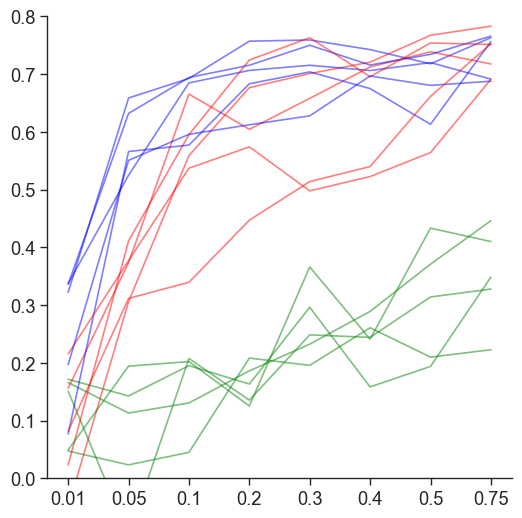

In [4]:
import seaborn as sns
sns.set_style('ticks')
sns.set_context("paper", font_scale=1.5)
prompt_list = ["prompt#1", "prompt#2", "prompt#3", "prompt#4", "prompt#5"]
tick_list = ['0.01', '0.05', '0.1', '0.2', '0.3', '0.4', '0.5', '0.75']


result_gpt = []
result_gemini = []


fig, ax = plt.subplots(figsize = (6, 6))  # Create figure and axis

for current_prompt in prompt_list:
    #print(current_prompt)
    df_filtered         = filter_columns(merged_df, "gpt4", current_prompt)
    df_sorted           = sort_columns_by_slice(df_filtered)
    df_correlations     = df_sorted.corr()
    plt.plot(df_correlations.iloc[0,1:].values, color = 'blue', alpha = .5);
    result_gpt.append(df_correlations.iloc[0,1:].values)

    df_filtered         = filter_columns(merged_df, "gemini", current_prompt)
    df_sorted           = sort_columns_by_slice(df_filtered)
    df_correlations     = df_sorted.corr()
    plt.plot(df_correlations.iloc[0,1:].values, color = 'red', alpha = .5); 
    result_gemini.append(df_correlations.iloc[0,1:].values)

    df_filtered         = filter_columns(merged_df, "llama", current_prompt)
    df_sorted           = sort_columns_by_slice(df_filtered)
    df_correlations     = df_sorted.corr()
    plt.plot(df_correlations.iloc[0,1:].values, color = 'green', alpha = .5); 
    result_gemini.append(df_correlations.iloc[0,1:].values)

plt.ylim([0, 0.8])
tick_positions = range(len(tick_list))  # Ensure correct tick locations
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_list)  # Ensure labels match positions
sns.despine()
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


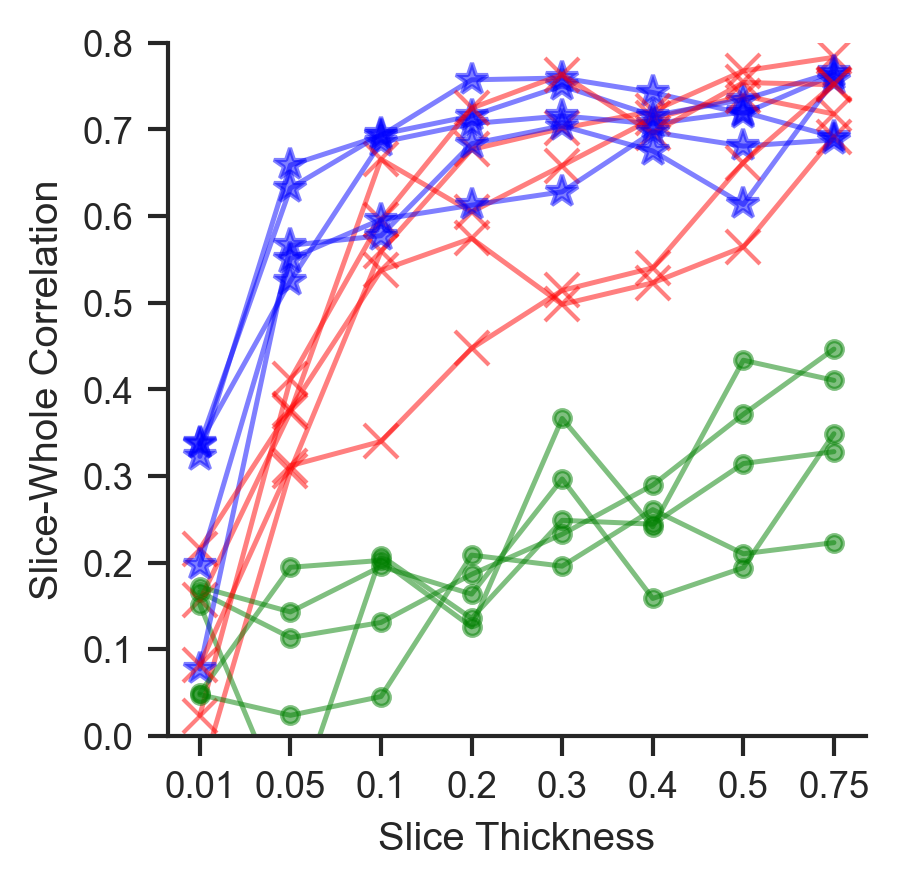

In [9]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Set seaborn style
sns.set_style('ticks')
sns.set_context("paper", font_scale=1.0)

prompt_list = ["prompt#1", "prompt#2", "prompt#3", "prompt#4", "prompt#5"]
tick_list = ['0.01', '0.05', '0.1', '0.2', '0.3', '0.4', '0.5', '0.75']

# Create empty lists to store results
result_gpt = []
result_gemini = []
result_llama = []


# Create figure and axis with higher DPI for publication quality
fig, ax = plt.subplots(figsize=(3, 3), dpi=300)

# Define markers to cycle through for each prompt
gpt_marker = ['*']  # Star, circle, square, triangle, diamond
gemini_marker = ['x']  # X, plus, pentagon, hexagon, octagon
llama_marker = ['.']

# Loop through prompts
for i, current_prompt in enumerate(prompt_list):
    # Get current markers
    gpt_marker = gpt_marker[i % len(gpt_marker)]
    gemini_marker = gemini_marker[i % len(gemini_marker)]
    llama_marker = llama_marker[i % len(llama_marker)]
    
    # Process GPT data
    df_filtered = filter_columns(merged_df, "gpt4", current_prompt)
    df_sorted = sort_columns_by_slice(df_filtered)
    df_correlations = df_sorted.corr()
    gpt_values = df_correlations.iloc[0,1:].values
    
    # Plot GPT line with markers
    plt.plot(gpt_values, color='blue', alpha=0.5, 
             marker=gpt_marker, markersize=8, markeredgecolor='blue', markerfacecolor='blue')
    result_gpt.append(gpt_values)
    
    # Process Gemini data
    df_filtered = filter_columns(merged_df, "gemini", current_prompt)
    df_sorted = sort_columns_by_slice(df_filtered)
    df_correlations = df_sorted.corr()
    gemini_values = df_correlations.iloc[0,1:].values
    
    # Plot Gemini line with markers
    plt.plot(gemini_values, color='red', alpha=0.5,
             marker=gemini_marker, markersize=8, markeredgecolor='red', markerfacecolor='red')
    result_gemini.append(gemini_values)

    # Process Llama data
    df_filtered = filter_columns(merged_df, "llama", current_prompt)
    df_sorted = sort_columns_by_slice(df_filtered)
    df_correlations = df_sorted.corr()
    llama_values = df_correlations.iloc[0,1:].values
    
    # Plot Gemini line with markers
    plt.plot(llama_values, color='green', alpha=0.5,
             marker=llama_marker, markersize=8, markeredgecolor='green', markerfacecolor='green')
    result_gemini.append(llama_values)


# Set axis limits and labels
plt.ylim([0, 0.8])
plt.xlabel("Slice Thickness")
plt.ylabel("Slice-Whole Correlation")

# Set x-ticks
tick_positions = range(len(tick_list))
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_list)

# Add legend for the mean lines
plt.legend(frameon=False)

# Improve text quality for SVG
plt.rcParams['svg.fonttype'] = 'none'  # Ensures text is text in SVG, not paths
plt.rcParams['font.family'] = 'Arial'  # Publication-standard font

# Remove spines
sns.despine()

# Save as SVG for publication quality
plt.savefig("../data/figures_tables/prompt_correlation_comparison_gemini_gpt_llama.svg", format="svg", bbox_inches="tight")

# Show the plot
plt.show()

In [9]:
import numpy as np
result_gpt = np.asarray(result_gpt)
result_gemini = np.asarray(result_gemini)
result_gemini.shape

(5, 8)

In [10]:
df = pd.DataFrame(np.vstack((result_gpt, result_gemini)), columns = tick_list)
df['models'] = ['GPT','GPT','GPT','GPT','GPT','Gemini','Gemini','Gemini','Gemini','Gemini']
df['prompts'] = ['Prompt#1', 'Prompt#2','Prompt#3','Prompt#4','Prompt#5','Prompt#1', 'Prompt#2','Prompt#3','Prompt#4','Prompt#5']

In [11]:
df

,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.75,models,prompts
0,0.323791,0.536037,0.654237,0.715044,0.713802,0.744172,0.742118,0.669618,GPT,Prompt#1
1,0.260493,0.533202,0.675398,0.731967,0.672944,0.737273,0.744394,0.731422,GPT,Prompt#2
2,0.331306,0.537232,0.694354,0.724446,0.745763,0.731582,0.701367,0.749376,GPT,Prompt#3
3,0.253020,0.553587,0.759398,0.716614,0.729455,0.726092,0.691123,0.723149,GPT,Prompt#4
4,0.098524,0.436064,0.650498,0.702910,0.676848,0.569334,0.648621,0.718401,GPT,Prompt#5
5,0.020968,0.329599,0.554303,0.536297,0.643908,0.662784,0.703425,0.740960,Gemini,Prompt#1
6,0.269842,0.439265,0.596947,0.612169,0.656313,0.660512,0.780806,0.795146,Gemini,Prompt#2
7,-0.002990,0.439112,0.583142,0.689191,0.704356,0.759094,0.775605,0.775638,Gemini,Prompt#3
8,0.252497,0.314137,0.560842,0.445941,0.505650,0.557048,0.578492,0.642218,Gemini,Prompt#4
9,0.066095,0.297291,0.390074,0.504913,0.520080,0.563109,0.626680,0.672550,Gemini,Prompt#5


In [12]:
df.to_csv('../data/interim.csv')

In [13]:
# Re-create DataFrame from provided data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define column names
columns = ["0.01", "0.05", "0.1", "0.2", "0.3", "0.4", "0.5", "0.75", "models", "prompts"]


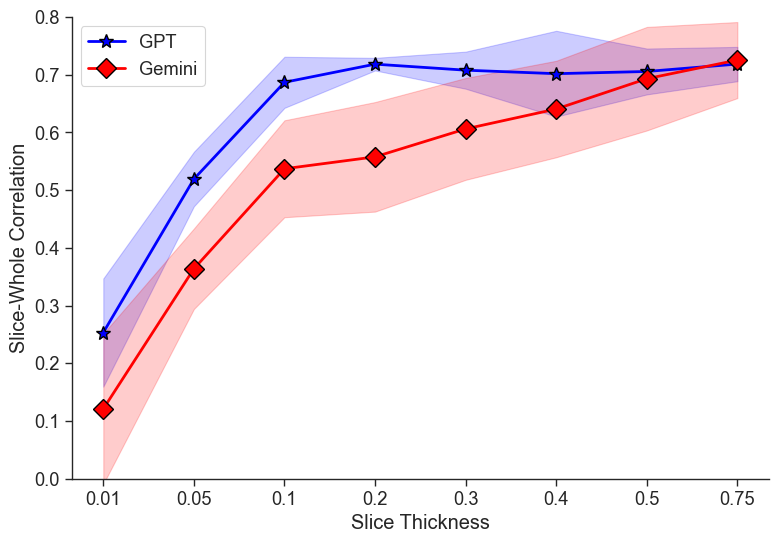

In [19]:
# Assuming df is your DataFrame that's already loaded
# First, let's define the columns
columns = df.columns.tolist()  # Get all column names

# Convert accuracy columns to float (excluding 'models' and 'prompts')
accuracy_columns = columns[:-2]  # This assumes the last 2 columns are 'models' and 'prompts'
df[accuracy_columns] = df[accuracy_columns].astype(float)

# Compute mean and standard deviation for each model
df_mean = df.groupby("models")[accuracy_columns].mean()
df_std = df.groupby("models")[accuracy_columns].std()

# Define colors and markers for models
colors = {"GPT": "blue", "Gemini": "red"}
markers = {"GPT": "*", "Gemini": "D"}  # Using 'D' (diamond) instead of '#' which isn't a valid marker

# Create figure and axis
plt.figure(figsize=(9, 6))
ax = plt.gca()  # Get current axis

# Define tick_list based on accuracy_columns
tick_list = accuracy_columns  # Or any other appropriate labels for your x-axis

# Plot shaded lines with markers
for model in df_mean.index:
    means = df_mean.loc[model]
    stds = df_std.loc[model]
    color = colors.get(model, "gray")
    marker = markers.get(model, "o")  # Get marker for model or use 'o' as default
    
    # Plot mean line with markers
    plt.plot(means.index, means, label=model, color=color, linewidth=2, 
             marker=marker, markersize=10, markeredgecolor="black")
    
    # Add shaded region for standard deviation
    plt.fill_between(means.index, means - stds, means + stds, color=color, alpha=0.2)

# Formatting
plt.xlabel("Slice Thickness")
plt.ylabel("Slice-Whole Correlation")
plt.ylim([0, 0.8])

# Ensure tick positions are properly defined
tick_positions = range(len(tick_list))
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_list)

plt.legend()
sns.despine()


plt.savefig("../data/figures_tables/model_comparison_plot.svg", format="svg", bbox_inches="tight")

plt.show()

In [31]:
merged_df

,name,corrected_transcripts_gemini1.5flash_slice#0.01_prompt#1_rating,corrected_transcripts_gemini1.5flash_slice#0.01_prompt#2_rating,corrected_transcripts_gemini1.5flash_slice#0.01_prompt#3_rating,corrected_transcripts_gemini1.5flash_slice#0.01_prompt#4_rating,corrected_transcripts_gemini1.5flash_slice#0.01_prompt#5_rating,corrected_transcripts_gemini1.5flash_slice#0.05_prompt#1_rating,corrected_transcripts_gemini1.5flash_slice#0.05_prompt#2_rating,corrected_transcripts_gemini1.5flash_slice#0.05_prompt#3_rating,corrected_transcripts_gemini1.5flash_slice#0.05_prompt#4_rating,...,corrected_transcripts_gpt4omini_slice#1.0_prompt#5_rating,avg_slice_0.01,avg_slice_0.05,avg_slice_0.1,avg_slice_0.2,avg_slice_0.3,avg_slice_0.4,avg_slice_0.5,avg_slice_0.75,avg_slice_1.0
0,SUB001_SPEECH001,2,2,2,2,2,4,4,4,4,...,4,3.1,4.2,5.3,4.6,4.5,4.2,4.3,4.4,4.2
1,SUB002_SPEECH001,3,3,2,2,2,4,4,4,4,...,4,3.1,4.0,4.1,4.3,3.9,4.2,4.2,4.0,4.1
2,SUB003_SPEECH001,3,2,3,3,2,4,3,4,3,...,4,3.0,3.7,3.9,3.8,3.9,3.8,3.6,3.7,3.9
3,SUB005_SPEECH001,4,4,3,3,3,4,3,3,3,...,3,3.4,3.4,3.5,3.8,3.3,3.5,3.7,3.9,3.7
4,SUB005_SPEECH002,2,2,2,2,1,3,3,3,3,...,4,2.3,3.4,3.8,3.8,4.0,3.8,3.5,3.7,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,SUB078_SPEECH002,6,4,4,4,3,6,4,6,6,...,5,4.5,5.5,5.9,5.8,5.9,5.4,5.6,5.5,5.5
124,SUB079_SPEECH001,2,2,2,2,1,4,4,4,4,...,8,2.6,5.0,5.4,5.8,5.9,6.5,6.6,6.7,6.7
125,SUB079_SPEECH002,2,2,2,2,2,6,4,6,4,...,7,2.8,5.0,5.7,5.9,6.1,6.4,6.2,6.3,6.6
126,SUB080_SPEECH001,2,2,2,2,2,4,4,3,4,...,5,2.5,4.0,4.0,4.1,4.2,4.0,4.6,4.7,4.1


In [32]:

slice_mapping = {}
for col in merged_df.columns:
    match = re.search(r'slice#([\d.]+)', col)  # Extract the slice number
    if match:
        slice_value = match.group(1)
        if slice_value not in slice_mapping:
            slice_mapping[slice_value] = []
        slice_mapping[slice_value].append(col)

# Compute row-wise mean for each slice
for slice_value, cols in slice_mapping.items():
    merged_df[f'avg_slice_{slice_value}'] = merged_df[cols].mean(axis=1)

df_avg_slices = merged_df[[col for col in merged_df.columns if 'avg_slice_' in col]]
df_avg_slices.head()

,avg_slice_0.01,avg_slice_0.05,avg_slice_0.1,avg_slice_0.2,avg_slice_0.3,avg_slice_0.4,avg_slice_0.5,avg_slice_0.75,avg_slice_1.0
0,3.1,4.2,5.3,4.6,4.5,4.2,4.3,4.4,4.2
1,3.1,4.0,4.1,4.3,3.9,4.2,4.2,4.0,4.1
2,3.0,3.7,3.9,3.8,3.9,3.8,3.6,3.7,3.9
3,3.4,3.4,3.5,3.8,3.3,3.5,3.7,3.9,3.7
4,2.3,3.4,3.8,3.8,4.0,3.8,3.5,3.7,3.7


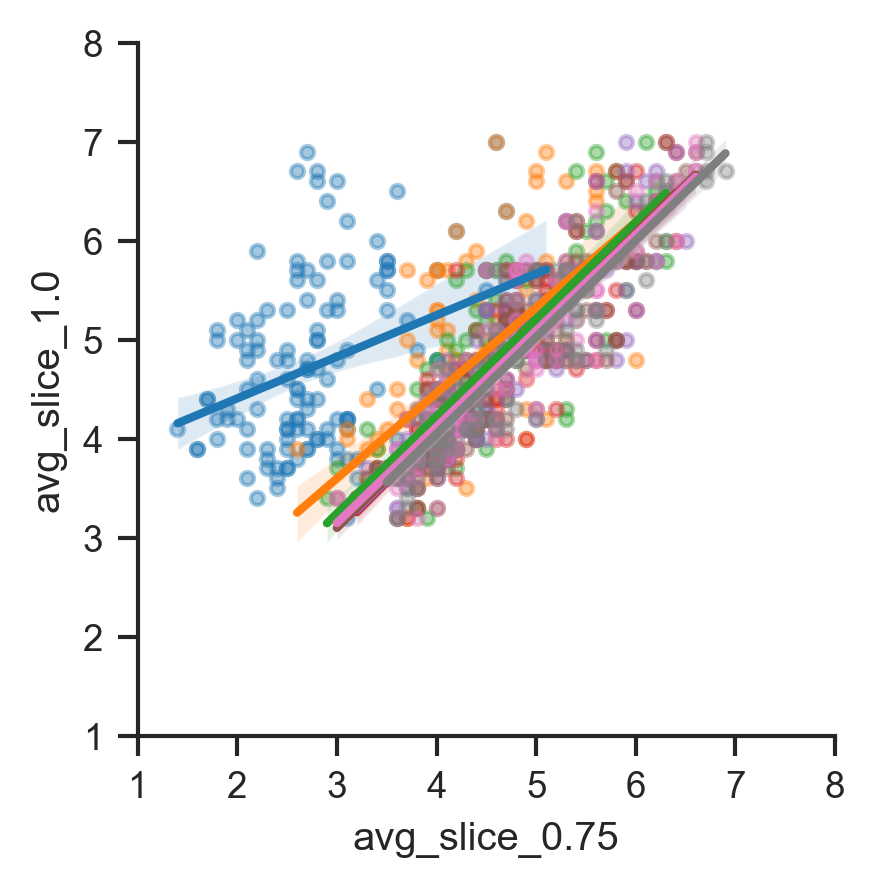

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

# Set seaborn style
sns.set_style('ticks')
sns.set_context("paper", font_scale=1.)

# Extract the columns needed for the plot
y_column = "avg_slice_1.0"
x_columns = [col for col in df_avg_slices.columns if col != y_column]

# Create scatter plots
plt.figure(figsize=(3, 3), dpi=300)

for x_col in x_columns:
    sns.regplot(
        y=df_avg_slices[y_column],
        x=df_avg_slices[x_col],
        scatter=True,
        label=x_col,
        scatter_kws={"alpha": 0.4, "s": 10},  # Light scatter points
        line_kws={"linewidth": 2}  # Make regression line more visible
    )

# Formatting the plot
#plt.xlabel("")
#plt.ylabel("")
#plt.title("Scatterplot of Different Slices Against avg_slice_1.0")
#plt.legend(title="Slice Values", loc='lower right', fontsize=10, frameon=False)  
#plt.grid(True)


plt.xlim([1, 8])
plt.ylim([1, 8])

ax = plt.gca()
ax.set_xticks(np.arange(1, 9))  # Explicitly set ticks
ax.set_xticklabels(np.arange(1, 9))  # Explicitly set tick labels


sns.despine()
plt.savefig("../data/figures_tables/model_comparison_scatterplot.svg", format="svg", bbox_inches="tight")

plt.show()


In [50]:
np.arange(1, 9)

array([1, 2, 3, 4, 5, 6, 7, 8])